In [1]:
################################

### Load packages

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.stats
import collections

In [3]:
# Create empty dictionary to populate
d = collections.defaultdict(dict)

# Fill empty dictionary in for-loop 
for trimer in ['homotrimer', 'heterotrimer', 'apo-homotrimer', 'apo-heterotrimer']:
    for chain in ['A', 'B', 'C']:

        # Specify path to directory
        path = "/mnt/d/Dropbox/Emily Johnson BBSRC NLD DTP supervisors/computational_work/3d_modelling_and_md/type_i_col_propeptide/equilibrium_simulation_results/distance/{}/{}/".format(trimer, chain)

        # Create the list of file names: filenames
        filenames = os.listdir(path)

        # Append data from each replicate to list 
        data = []
        for file in filenames:
            if file.endswith('.xvg'):
                x,y = np.loadtxt(path+"{}".format(file),comments=['#','@'],unpack=True)
                y = y[:40001]
                x = x[:40001]
                data.append(y)
        
        # Create dataframe from list
        d[trimer][chain] = pd.DataFrame(np.transpose(data), index=x)
        d[trimer][chain].index.names = ["Time (ns)"]

        # Analyse newly made data-frame
        d[trimer][chain]['Mean'] = d[trimer][chain].iloc[:, 0:len(data)].mean(axis=1)
        d[trimer][chain]['Standard Deviation'] = d[trimer][chain].iloc[:, 0:len(data)].std(axis=1)
        d[trimer][chain]['Standard Error'] = d[trimer][chain].iloc[:, 0:len(data)].sem(axis=1)
        d[trimer][chain]['Std dev/2'] = d[trimer][chain]['Standard Deviation']/2

        # Reset index so it can be used as a value for x
        d[trimer][chain] = d[trimer][chain].reset_index()

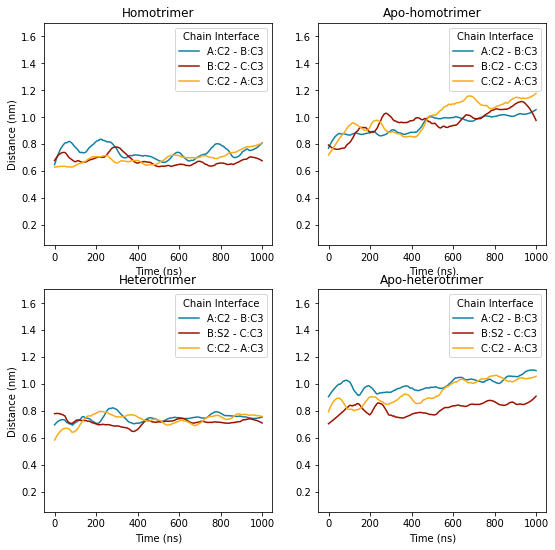

In [6]:
### Plot Data 

import matplotlib as mpl
from cycler import cycler
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['#1280a1', '#991200', '#faab18'])
plt.figure(figsize=(9, 9))

### Homotrimer 
plt.subplot(2, 2, 1)
x = d['homotrimer']['A']['Time (ns)']
y = d['homotrimer']['A']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='A:C2 - B:C3')

x = d['homotrimer']['B']['Time (ns)']
y = d['homotrimer']['B']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='B:C2 - C:C3')

x = d['homotrimer']['C']['Time (ns)']
y = d['homotrimer']['C']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='C:C2 - A:C3')

# Formatting
plt.title('Homotrimer')
plt.ylim(0.05,1.7)
plt.xlabel('Time (ns)' )
plt.ylabel('Distance (nm)')
plt.legend()
plt.legend(loc='upper right', title='Chain Interface')

### Apo-homotrimer
plt.subplot(2, 2, 2)
x = d['apo-homotrimer']['A']['Time (ns)']
y = d['apo-homotrimer']['A']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='A:C2 - B:C3')

x = d['apo-homotrimer']['B']['Time (ns)']
y = d['apo-homotrimer']['B']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='B:C2 - C:C3')

x = d['apo-homotrimer']['C']['Time (ns)']
y = d['apo-homotrimer']['C']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='C:C2 - A:C3')

plt.title('Apo-homotrimer')
plt.ylim(0.05,1.7)
plt.xlabel('Time (ns)' )
plt.legend()
plt.legend(loc='upper right', title='Chain Interface')

#### Heterotrimer
plt.subplot(2, 2, 3)
x = d['heterotrimer']['A']['Time (ns)']
y = d['heterotrimer']['A']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='A:C2 - B:C3')

x = d['heterotrimer']['B']['Time (ns)']
y = d['heterotrimer']['B']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='B:S2 - C:C3')

x = d['heterotrimer']['C']['Time (ns)']
y = d['heterotrimer']['C']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='C:C2 - A:C3')

plt.title('Heterotrimer')
plt.ylim(0.05,1.7)
plt.xlabel('Time (ns)' )
plt.ylabel('Distance (nm)')
plt.legend()
plt.legend(loc='upper right', title='Chain Interface')


#### Apo-heterotrimer
plt.subplot(2, 2, 4)
x = d['apo-heterotrimer']['A']['Time (ns)']
y = d['apo-heterotrimer']['A']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='A:C2 - B:C3')

x = d['apo-heterotrimer']['B']['Time (ns)']
y = d['apo-heterotrimer']['B']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='B:S2 - C:C3')

x = d['apo-heterotrimer']['C']['Time (ns)']
y = d['apo-heterotrimer']['C']['Mean']
yhat = scipy.signal.savgol_filter(y, 4001, 2)
plt.plot(x, yhat, label='C:C2 - A:C3')

plt.title('Apo-heterotrimer')
plt.ylim(0.05,1.7)
plt.xlabel('Time (ns)' )
plt.legend()
plt.legend(loc='upper right', title='Chain Interface')
plt.savefig('distance.png', bbox_inches='tight',dpi=300)
plt.show()

In [8]:
for trimer in ['homotrimer', 'heterotrimer', 'apo-homotrimer', 'apo-heterotrimer']:
    for chain in ['A', 'B', 'C']:

        average = d[trimer][chain]['Mean'].mean().round(3)
        error = d[trimer][chain]['Mean'].std().round(3)
        
        print("{} : The average distance between chain {} and its neighbouring chain is {} nm and the error is {}.".format(trimer, chain, average, error))

homotrimer : The average distance between chain A and its neighbouring chain is 0.741 nm and the error is 0.059.
homotrimer : The average distance between chain B and its neighbouring chain is 0.677 nm and the error is 0.049.
homotrimer : The average distance between chain C and its neighbouring chain is 0.694 nm and the error is 0.053.
heterotrimer : The average distance between chain A and its neighbouring chain is 0.746 nm and the error is 0.04.
heterotrimer : The average distance between chain B and its neighbouring chain is 0.715 nm and the error is 0.039.
heterotrimer : The average distance between chain C and its neighbouring chain is 0.734 nm and the error is 0.051.
apo-homotrimer : The average distance between chain A and its neighbouring chain is 0.944 nm and the error is 0.076.
apo-homotrimer : The average distance between chain B and its neighbouring chain is 0.963 nm and the error is 0.097.
apo-homotrimer : The average distance between chain C and its neighbouring chain is